# Clustering :

It is a process which divides the dataset into homogeneous groups i.e similar objects into same groups.Clustering Algorithms are broadly classified into two types :
1) Unsupervised linear clustering algorithms. 
2) Unsupervised non-linear clustering algorithms.

I. Unsupervised Linear Clustering Algorithm : No labels are given to the learning algorithm, leaving it on it's own to find the structure in its input i.e nothing but discovering hidden patterns in the data.

II. Supervised Learning Clustering Algorithm : It is presented with example inputs and its desired outputs and it's goal is to map those inputs to outputs.


Proximity Measures : 
For clustering we need to define the proximity measures for  two points. It defines how the two points are similar to each other. The three similarity measures are :
Vectors : Cosine Distance 
Sets : Jaccard Distance
Points : Euclidean Distance

Conditions need to be satisfied for clustering algorithm :
1)Scalability - Data must be scalable otherwise we may get the wrong result. Fig II shows simple graphical example where we may get the wrong result.
2)Clustering algorithm must be able to deal with different types of attributes.
3)Clustering algorithm must be able to find clustered data with the arbitrary shape.
4)Clustering algorithm must be insensitive to noise and outliers.
5)Interpret-ability and Usability - Result obtained must be interpretable and usable so that maximum knowledge about 
the input parameters can be obtained.  
6)Clustering algorithm must be able to deal with data set of high dimensionality.


# K-means

The k-means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or with-in cluster sum-of-squares. It requires number of clusters to be specified. The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean \mu_j of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion: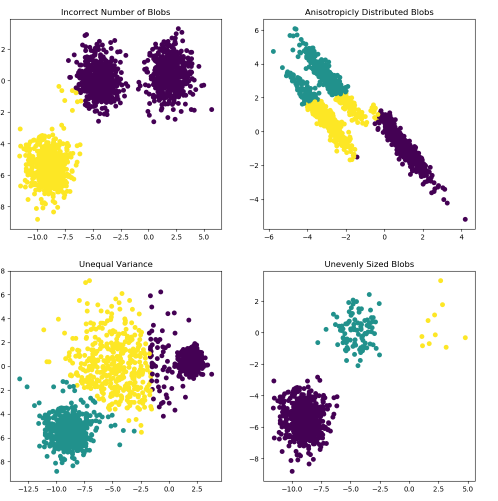

\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)
Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:
Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

It is  often referred as Lloyd's Algorithm. The algorithm has three steps :
It chooses the initial centroids, being to choose k samples from the dataset X.
After the initialization, K-means consists of looping between two steps. The first step assigns each sample to its nearest centroid. The next step creates new centroids by taking the mean value of all the samples assigned to each previous centroid. The difference between these are computed and the algorithm repeats the last two steps until this value is less than threshold i.e it repeats until the centroids do not  move significantly.

The input samples are {[1.0, 1.0], [1.5, 2.0], [3.0, 4.0], [5.0, 7.0], [3.5, 5.0], [4.5, 5.0], [3.5, 4.5]}. We need to display them in the form of clusters using k-means.

In [1]:
import random
import math

NUM_CLUSTERS = 2
TOTAL_DATA = 7
LOWEST_SAMPLE_POINT = 0 #element 0 of SAMPLES.
HIGHEST_SAMPLE_POINT = 3 #element 3 of SAMPLES.
BIG_NUMBER = math.pow(10, 10)

SAMPLES = [[1.0, 1.0], [1.5, 2.0], [3.0, 4.0], [5.0, 7.0], [3.5, 5.0], [4.5, 5.0], [3.5, 4.5]]

data = []
centroids = []

class DataPoint:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def set_x(self, x):
        self.x = x
    
    def get_x(self):
        return self.x
    
    def set_y(self, y):
        self.y = y
    
    def get_y(self):
        return self.y
    
    def set_cluster(self, clusterNumber):
        self.clusterNumber = clusterNumber
    
    def get_cluster(self):
        return self.clusterNumber

class Centroid:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def set_x(self, x):
        self.x = x
    
    def get_x(self):
        return self.x
    
    def set_y(self, y):
        self.y = y
    
    def get_y(self):
        return self.y

In [2]:
def initialize_centroids():
    # Set the centoid coordinates to match the data points furthest from each other.
    # In this example, (1.0, 1.0) and (5.0, 7.0)
    centroids.append(Centroid(SAMPLES[LOWEST_SAMPLE_POINT][0], SAMPLES[LOWEST_SAMPLE_POINT][1]))
    centroids.append(Centroid(SAMPLES[HIGHEST_SAMPLE_POINT][0], SAMPLES[HIGHEST_SAMPLE_POINT][1]))
    
    print("Centroids initialized at:")
    print("(", centroids[0].get_x(), ", ", centroids[0].get_y(), ")")
    print("(", centroids[1].get_x(), ", ", centroids[1].get_y(), ")")
    print()
    return

In [3]:
def initialize_datapoints():
    # DataPoint objects' x and y values are taken from the SAMPLE array.
    # The DataPoints associated with LOWEST_SAMPLE_POINT and HIGHEST_SAMPLE_POINT are initially
    # assigned to the clusters matching the LOWEST_SAMPLE_POINT and HIGHEST_SAMPLE_POINT centroids.
    for i in range(TOTAL_DATA):
        newPoint = DataPoint(SAMPLES[i][0], SAMPLES[i][1])
        
        if(i == LOWEST_SAMPLE_POINT):
            newPoint.set_cluster(0)
        elif(i == HIGHEST_SAMPLE_POINT):
            newPoint.set_cluster(1)
        else:
            newPoint.set_cluster(None)
            
        data.append(newPoint)
    
    return

In [4]:
def get_distance(dataPointX, dataPointY, centroidX, centroidY):
    # Calculate Euclidean distance.
    return math.sqrt(math.pow((centroidY - dataPointY), 2) + math.pow((centroidX - dataPointX), 2))

def recalculate_centroids():
    totalX = 0
    totalY = 0
    totalInCluster = 0
    
    for j in range(NUM_CLUSTERS):
        for k in range(len(data)):
            if(data[k].get_cluster() == j):
                totalX += data[k].get_x()
                totalY += data[k].get_y()
                totalInCluster += 1
        
        if(totalInCluster > 0):
            centroids[j].set_x(totalX / totalInCluster)
            centroids[j].set_y(totalY / totalInCluster)
    
    return

def update_clusters():
    isStillMoving = 0
    
    for i in range(TOTAL_DATA):
        bestMinimum = BIG_NUMBER
        currentCluster = 0
        
        for j in range(NUM_CLUSTERS):
            distance = get_distance(data[i].get_x(), data[i].get_y(), centroids[j].get_x(), centroids[j].get_y())
            if(distance < bestMinimum):
                bestMinimum = distance
                currentCluster = j
        
        data[i].set_cluster(currentCluster)
        
        if(data[i].get_cluster() is None or data[i].get_cluster() != currentCluster):
            data[i].set_cluster(currentCluster)
            isStillMoving = 1
    
    return isStillMoving

def perform_kmeans():
    isStillMoving = 1
    
    initialize_centroids()
    
    initialize_datapoints()
    
    while(isStillMoving):
        recalculate_centroids()
        isStillMoving = update_clusters()
    
    return

def print_results():
    for i in range(NUM_CLUSTERS):
        print("Cluster ", i, " includes:")
        for j in range(TOTAL_DATA):
            if(data[j].get_cluster() == i):
                print("(", data[j].get_x(), ", ", data[j].get_y(), ")")
        print()
    
    return

perform_kmeans()
print_results()

Centroids initialized at:
('(', 1.0, ', ', 1.0, ')')
('(', 5.0, ', ', 7.0, ')')
()
('Cluster ', 0, ' includes:')
('(', 1.0, ', ', 1.0, ')')
('(', 1.5, ', ', 2.0, ')')
()
('Cluster ', 1, ' includes:')
('(', 3.0, ', ', 4.0, ')')
('(', 5.0, ', ', 7.0, ')')
('(', 3.5, ', ', 5.0, ')')
('(', 4.5, ', ', 5.0, ')')
('(', 3.5, ', ', 4.5, ')')
()


# Clustering The Cricket Players Based On Stats:

The implementation can be divided into the following:

Handle Data: Clean the file, normalize the parameters, given numeric values to non-numeric attributes. Read data from the file and split the data for cross validation.
Find Initial Centroids: Choose k centroids in random.
Distance Calculation: Finding the distance between each of the datapoints with each of the centroids. This distance metric is used to find the which cluster the points belong to.
Re-calculating the centroids: Find the new values for centroid.
Stop the iteration: Stop the algorithm when the difference between the old and the new centroids is negligible.

In [10]:
# Creation of class for the algorithm.
class K_Means:

	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations

k is the number of the clusters.
When the difference between the old and new centroids is less than the tolerance value, we stop the iterations. The final argument is the max_iterations which specifies the maximum number of times the algorithm can iterate trying to optimize the centroid values, the default value is set to 500 iterations. So, by default, teh algorithm stops when the difference between the old and the new centroids is less than 0.0001x or when the number of iterations has crossed 500.

In [18]:
#To deal with csv file we need to import the pandas.
import pandas as pd 
df = pd.read_csv("C:/Users/SUPRAJA GARLAPATI/Downloads/Machine-Learning-Algorithms-from-Scratch-master/data/ipl.csv")
df

,one,two
0,0.227680,0.858204
1,0.979188,0.077151
2,0.504577,0.553114
3,0.058132,0.528098
4,0.775343,0.217922
5,0.550424,0.470860
6,0.045787,0.918579
7,0.585770,0.058032
8,0.709072,0.581874
9,0.018504,0.886523


In [47]:
df1 = pd.read_csv("C:/Users/SUPRAJA GARLAPATI/Downloads/Machine-Learning-Algorithms-from-Scratch-master/data/ipl_bowlers_norm.csv")
df1

,name,one,two
0,DA Warner,0.479684,0.620957
1,LMP Simmons,0.501217,0.405964
2,AM Rahane,0.550973,0.458294
3,AB de Villiers,0.521168,0.737848
4,V Kohli,0.512287,0.458798
5,CH Gayle,0.451582,0.563584
6,RG Sharma,0.372628,0.546498
7,SS Iyer,0.364599,0.443226
8,BB McCullum,0.361800,0.615661
9,KA Pollard,0.417153,0.665847


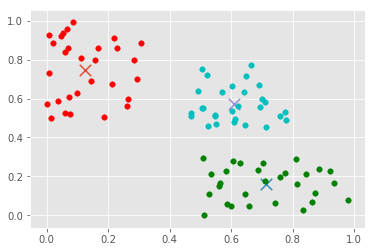

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpld3
from matplotlib import style
import pandas as pd 

style.use('ggplot')

class K_Means:
	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations

	def fit(self, data):

		self.centroids = {}

		#initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
		for i in range(self.k):
			self.centroids[i] = data[i]

		#begin iterations
		for i in range(self.max_iterations):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			#find the distance between the point and cluster; choose the nearest centroid
			for features in data:
				distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				classification = distances.index(min(distances))
				self.classes[classification].append(features)

			previous = dict(self.centroids)

			#average the cluster datapoints to re-calculate the centroids
			for classification in self.classes:
				self.centroids[classification] = np.average(self.classes[classification], axis = 0)

			isOptimal = True #to see if our algorithm has reached the optimal values of centroids with the flag.

			for centroid in self.centroids:

				original_centroid = previous[centroid]
				curr = self.centroids[centroid]

				if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
					isOptimal = False

			#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
			if isOptimal:
				break

	def pred(self, data):
		distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
		classification = distances.index(min(distances))
		return classification

def main():
	
	df = pd.read_csv("C:/Users/SUPRAJA GARLAPATI/Downloads/Machine-Learning-Algorithms-from-Scratch-master/data/ipl.csv")
	df = df[['one', 'two']]
	dataset = df.astype(float).values.tolist()

	X = df.values #returns a numpy array
	
	km = K_Means(3)
	km.fit(X)

	# Plotting starts here
	colors = 10*["r", "g", "c", "b", "k"]

	for centroid in km.centroids:
		plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")#mark our centroids with an x.

	for classification in km.classes:
		color = colors[classification]
		for features in km.classes[classification]:
			plt.scatter(features[0], features[1], color = color,s = 30)
	
	mpld3.show()

if __name__ == "__main__":
	main()

Scatter plot with clustering done on it using K Means. The three clusters can be thought of as Batsmen (Red), Bowlers(Green) and Allrounders(Blue) in the above output.

# MiniBatch KMeans Algorithm :

MiniBatch K-Means is the variant of KMeans algorithm which uses mini-batches to reduce the computation time, Mini-batches are subsets of the input data, randomly sampled in each training iteration.It reduces the  amount of time required to converge to a local solution.
There are two steps to perform this algorithm. In the first step, b samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. In the second step, the centroids are updated. In contrast to k-means, this is done on a per-sample basis. The assigned centroid is updated by taking the streaming average of the sample and all previous samples assigned to that centroid for each sample. This has the effect of reducing the rate of change for a centroid over time.



# Comparing the performance of MinibatchKmeans and Kmeans :
MinibatchKMeans is faster when compared to kmeans but gives different results.

Automatically created module for IPython interactive environment


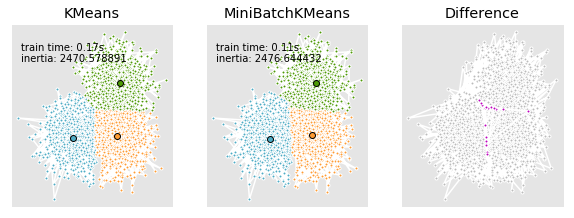

In [89]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

# #############################################################################
# Compute clustering with Means

k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

# #############################################################################
# Compute clustering with MiniBatchKMeans

mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

# #############################################################################
# Plot result

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
         (t_mini_batch, mbk.inertia_))

# Initialise the different array to all False
different = (mbk_means_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == order[k]))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

Both produces different results.MiniBatch Kmeans converges faster than Kmeans but the quality of the resultsn is reduced which is quite small.

https://sites.google.com/site/dataclusteringalgorithms/home
http://mnemstudio.org/clustering-k-means-example-1.htm
https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a
http://madhugnadig.com/articles/machine-learning/2017/03/04/implementing-k-means-clustering-from-scratch-in-python.html
https://www.slideshare.net/kasunrangawijeweera/k-means-clustering-algorithm?next_slideshow=1
https://www.slideshare.net/DarshakMehta6/k-means-clustering-algorithm-63472248
http://scikit-learn.org/stable/modules/clustering.html#k-means